In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# reading dataset

df = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]

print('confirmed data:',df.shape[0])


# Selecting people from North with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='RO')|(df['SG_UF_NOT']=='TO')|(df['SG_UF_NOT']=='AM')|(df['SG_UF_NOT']=='RR')\
#|(df['SG_UF_NOT']=='AC')|(df['SG_UF_NOT']=='PA')|(df['SG_UF_NOT']=='AP')]


# Selecting people from Northeast with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='RN')|(df['SG_UF_NOT']=='PE')|(df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
#|(df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')|(df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')\
#|(df['SG_UF_NOT']=='MA')]


# Selecting people from Center-West with COVID-19
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
[(df['SG_UF_NOT']=='DF')|(df['SG_UF_NOT']=='MS')|(df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]


# Selecting people from Southest with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')|(df['SG_UF_NOT']=='ES')|(df['SG_UF_NOT']=='MG')]


# Selecting people from South with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='RS')|(df['SG_UF_NOT']=='SC')|(df['SG_UF_NOT']=='PR')]


#print('confirmed data in North :',df.shape[0])
#print('confirmed data in Northeast:',df.shape[0])
print('confirmed data in Center-West:',df.shape[0])
#print('confirmed data in Southest:',df.shape[0])
#print('confirmed data in South:',df.shape[0])




/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-1-5fd4e26db3b5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-1-5fd4e26db3b5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-1-5fd4e26db3b5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOL

confirmed data: 242679


<ipython-input-1-5fd4e26db3b5>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\


confirmed data in Center-West: 11645


In [2]:
# comorbidities
df = df[['CS_ESCOL_N','EVOLUCAO','CARDIOPATI','HEMATOLOGI','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE',\
        'RENAL','OBESIDADE']]


# replacing values
df = df.fillna(0)
df.iloc[:,2:] = df.iloc[:,2:].replace([9,2], 0)

In [3]:
# adding comorbidities

df['sum_comorbidities'] = df.iloc[:,2:].sum(axis=1)


In [4]:
# Normalization

Illiterate = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 0)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
fundamentalI = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
fundamentalII = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
medium = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 3)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
university = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)


In [5]:
# Death and cured people

Illiterate_dea = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 0)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
fundamentalI_dea = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
fundamentalII_dea = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
medium_dea = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
university_dea = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)


Illiterate_cur = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 0)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
fundamentalI_cur = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
fundamentalII_cur = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
medium_cur = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
university_cur = df['sum_comorbidities'][((df['CS_ESCOL_N'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)


# 2  = death   1 = cure

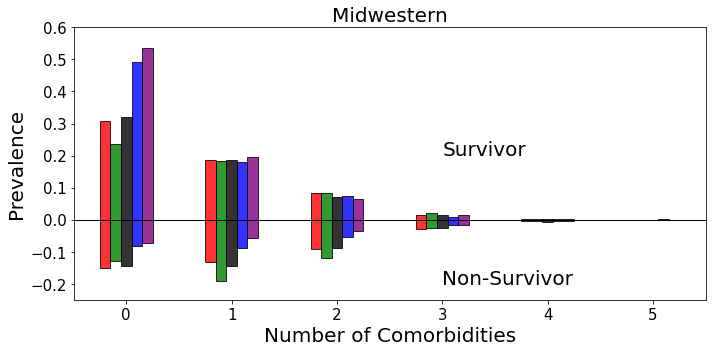

In [8]:
# Plotting the graphic

plt.figure(figsize=(10,5))

barWidth = 0.1

plt.bar(Illiterate_cur.index-0.2, Illiterate_cur/Illiterate.sum(), color='red', alpha =0.8, width=barWidth, edgecolor='black')
plt.bar(fundamentalI_cur.index-0.1, fundamentalI_cur/fundamentalI.sum(), color='green', alpha =0.8, width=barWidth, edgecolor='black')
plt.bar(fundamentalII_cur.index, fundamentalII_cur/fundamentalII.sum(), color='black', alpha =0.8, width=barWidth, edgecolor='black')
plt.bar(medium_cur.index + 0.1, medium_cur/medium.sum() , color='blue', alpha =0.8, width=barWidth, edgecolor='black')
plt.bar(university_cur.index + 0.2, university_cur/university.sum() ,color='purple', alpha =0.8, width=barWidth, edgecolor='black')


plt.bar(Illiterate_dea.index-0.2, -Illiterate_dea/Illiterate.sum(), color='red', alpha =0.8, width=barWidth, edgecolor='black', label='Illiterate')
plt.bar(fundamentalI_dea.index-0.1, -fundamentalI_dea/fundamentalI.sum(), color='green', alpha =0.8, width=barWidth, edgecolor='black', label='Fundamental I')
plt.bar(fundamentalII_dea.index, -fundamentalII_dea/fundamentalII.sum(), color='black', alpha =0.8, width=barWidth, edgecolor='black', label='Fundamental II')
plt.bar(medium_dea.index+ 0.1, -medium_dea/medium.sum() , color='blue', alpha =0.8, width=barWidth, edgecolor='black', label='Medium')
plt.bar(university_dea.index + 0.2, -university_dea/university.sum() ,color='purple', alpha =0.8, width=barWidth, edgecolor='black', label='University')



plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Number of Comorbidities', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-0.5,5.5)

#plt.title('North', fontsize=20)
#plt.legend(fontsize=15,loc='upper right')
#plt.text(2.5, 0.20, 'Survivor', fontsize=20)
#plt.text(2.5, -0.2, 'Non-Survivor', fontsize=20)

#plt.title('Northeast', fontsize=20)
#plt.ylim(-0.26,0.35)
#plt.text(3, 0.20, 'Survivor', fontsize=20)
#plt.text(3, -0.2, 'Non-Survivor', fontsize=20)


plt.title('Midwestern', fontsize=20)
plt.ylim(-0.25,0.6)
plt.text(3, 0.20, 'Survivor', fontsize=20)
plt.text(3, -0.20, 'Non-Survivor', fontsize=20)

#plt.title('Southwest', fontsize=20)
#plt.text(3, 0.2, 'Survivor', fontsize=20)
#plt.text(3, -0.15, 'Non-Survivor', fontsize=20)
#plt.ylim(-0.20,0.35)


#plt.title('South', fontsize=20)
#plt.text(3, 0.2, 'Survivor', fontsize=20)
#plt.text(3, -0.12, 'Non-Survivor', fontsize=20)


plt.axhline(y=0,linewidth=1,color='k')
#plt.legend(fontsize=15)
plt.tight_layout()
#plt.savefig('north_comorbidities.pdf')
#plt.savefig('northeast_comorbidities.pdf')
plt.savefig('midwestern_comorbidities.pdf')
#plt.savefig('southeast_comorbidities.pdf')
#plt.savefig('south_comorbidities.pdf')


plt.show()

In [7]:
print(medium) 
print(medium.sum())

0.0    887
1.0    416
2.0    197
3.0     37
4.0      6
5.0      2
Name: sum_comorbidities, dtype: int64
1545
